<a href="https://www.kaggle.com/code/leomauro/data-analysis-super-mario-maker?scriptVersionId=118808265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Analysis - Super Mario Maker

Super Mario Maker is a game creation platform for the Nintendo Wii U, which allows players to design and play custom levels based on the Super Mario franchise. The game has a large and active community of players who create, play, and share levels with each other, making it a rich source of data for analysis. A data analysis of the Super Mario Maker dataset could focus on a number of different aspects of the game and its community. For example:

- Popularity of level themes: By analyzing the number of levels created and played within different themes, such as "Classic Mario," "Underwater," or "Castle," one could determine which themes are the most popular among players and level creators.
- Difficulty of levels: By analyzing the completion rate of levels, one could determine which levels are the most challenging for players and which ones are easier. One could also examine the design elements that make levels more difficult, such as the placement of obstacles, enemies, or power-ups.
- Trends in level creation: By tracking the number of levels created over time, one could determine if there are any trends or spikes in level creation and what might be causing them. For example, one could examine the impact of major updates to the game or the release of new tools or features.
- User engagement: By analyzing the number of plays, comments, and likes for different levels, one could determine which levels are the most popular and which creators are the most engaging with the community.

By performing this kind of data analysis, one could gain a deeper understanding of the Super Mario Maker community and its players, and could inform future development decisions and strategies. Additionally, this type of analysis could help identify areas where the game could be improved, such as by addressing challenges faced by players or by providing more tools and resources to level creators.

> **Summary** - Exploratory Data Analysis in Super Mario Maker, real data.
> Content for begginer level in Machine Learning and Data Science!

<a id='ToC'></a>
## Table of Contents
- [Data Preparation](#data)
- [Game Maps](#map)
- [Game Interactions](#network)

![](https://images.unsplash.com/photo-1612404730960-5c71577fca11?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)


<a id="data"></a>

---
# Data Preparation

Data preparation is a crucial step in the process of data analysis and machine learning. It refers to the process of cleaning, transforming, and organizing data so that it is ready for analysis. The goal of data preparation is to make the data accurate, consistent, and relevant to the problem at hand.

In [1]:
import os
# Pandas
import numpy as np
import pandas as pd
# Plot
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

## Reading data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/players.csv
/kaggle/input/records.csv
/kaggle/input/clears.csv
/kaggle/input/likes.csv
/kaggle/input/course-meta.csv
/kaggle/input/courses.csv
/kaggle/input/plays.csv


In [3]:
dataset_folder = '/kaggle/input/'
plot_folder = '/plot/'

courses = pd.read_csv(os.path.join(dataset_folder, 'courses.csv'), sep='\t', encoding='utf-8')
likes   = pd.read_csv(os.path.join(dataset_folder, 'likes.csv'), sep='\t', encoding='utf-8')
plays   = pd.read_csv(os.path.join(dataset_folder, 'plays.csv'), sep='\t', encoding='utf-8')
clears  = pd.read_csv(os.path.join(dataset_folder, 'clears.csv'), sep='\t', encoding='utf-8')
records = pd.read_csv(os.path.join(dataset_folder, 'records.csv'), sep='\t', encoding='utf-8')
players = pd.read_csv(os.path.join(dataset_folder, 'players.csv'), sep='\t', encoding='utf-8')

## Data Transformation

Create a `dict` to store the course's interactions.

In [4]:
ids = courses['id'].unique().tolist()
interactions = {id:{'likes':0, 'plays':0, 'clears':0, 'records':0} for id in ids}

## Data Overview

In [5]:
names = ['courses','likes','plays','clears','records']
for df_tmp, name in zip([courses,likes,plays,clears,records], names):
    print('%s:' % (name), len(df_tmp))

courses: 115032
likes: 618687
plays: 3941378
clears: 2051809
records: 117126


### Likes

In Super Mario Maker, users can like levels created by other users, and the number of likes a level receives can indicate its popularity and quality. By analyzing the likes received by different users, one could determine which users are the most popular and engaged with the community.

In [6]:
likes.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
1,2018-03-02 09:46:27.847,0000-0000-035A-9F14,jlan6e
2,2017-12-18 14:47:47.489,0001-0000-0347-486A,cat38690
3,2017-12-18 14:47:47.489,0001-0000-0347-486A,raulcaba
4,2017-12-18 14:47:48.878,0001-0000-0359-B3CD,Tugaeddy


In [7]:
# count number of likes per map
likes_per_course = likes['id'].value_counts().to_dict()

In [8]:
for id, values in likes_per_course.items():
    interactions[id]['likes'] = values

### Plays

In Super Mario Maker, users can play levels created by other users, and the number of plays a level receives can indicate its popularity and level of engagement with the community.

In [9]:
plays.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,gorigokky
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell


In [10]:
# count number of plays per map
plays_per_course = plays['id'].value_counts().to_dict()

In [11]:
for id, values in plays_per_course.items():
    interactions[id]['plays'] = values

### Clears

In Super Mario Maker, users can create and play levels, and the number of cleared courses by a user can indicate their level of difficulty.

In [12]:
clears.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,igatake0229


In [13]:
# count number of clears per map
clears_per_course = clears['id'].value_counts().to_dict()

In [14]:
for id, values in clears_per_course.items():
    interactions[id]['clears'] = values

### Records

In Super Mario Maker, users can create and play levels, and the record in courses reflects their best completion time for each level.

In [15]:
records.head()

,catch,id,player,timeRecord
0,2017-12-18 15:35:29.015,F68A-0000-0337-AF4F,The_Brucican,15482
1,2018-03-02 10:09:32.392,9669-0000-0330-554C,inoino2226,9265
2,2017-12-18 15:47:40.665,0D1D-0000-0355-DA7A,hbeeboy,6692
3,2018-02-23 15:02:20.557,18E3-0000-032A-27AB,Khazey,40383
4,2018-02-23 15:05:16.414,2C55-0000-0300-854A,okayan3378,1533


In [16]:
# count number of records per map
records_per_course = records['id'].value_counts().to_dict()

In [17]:
for id, values in records_per_course.items():
    interactions[id]['records'] = values

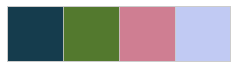

In [18]:
# palette of colors
palette = sns.color_palette('cubehelix', 4)
sns.palplot(palette)

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id="map"></a>

---
# Games Maps

In the game, players have access to a variety of tools and elements from classic Mario games, such as Goombas, pipes, and coins, to create their own unique levels. The resulting maps, known as Super Mario Maker maps, can be challenging, inventive, and highly creative, offering an endless supply of new and exciting levels to play. These maps can range from simple, straightforward designs to complex, multi-layered levels filled with intricate puzzles and traps.


In [19]:
# autopct pie plot - function
def func(pct, allvals):
    absolute = float(pct/100.*np.sum(allvals))/1000.0
    return "{:.1f}%\n({:.1f}k)".format(pct, absolute)

# plot
fontsize = 14

[('expert', 27753), ('superExpert', 6233), ('normal', 51354), ('easy', 29692)]


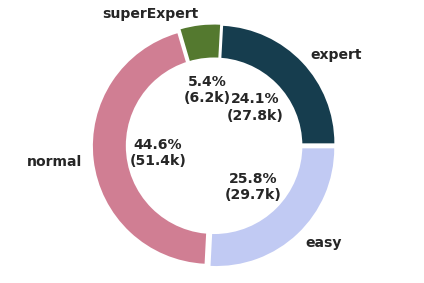

In [20]:
# values
labels = courses['difficulty'].unique().tolist()
values = [sum(courses['difficulty'] == label) for label in labels]
print(list(zip(labels, values)))
explode = [0.03] * len(values)

# plot
fig, ax = plt.subplots()
ax.pie(values, autopct=lambda pct: func(pct, values), pctdistance=0.45,
       colors=palette, explode=explode, labels=labels,
       textprops={'fontsize':fontsize,'weight':'bold'})
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# figure
ax.axis('equal')
plt.tight_layout()
# plt.savefig('%s/%s.pdf' % (plot_folder, 'difficulty'), dpi=300, bbox_inches='tight')
plt.show()

[('marioBros3', 9318), ('marioBrosU', 59464), ('marioWorld', 21908), ('marioBros', 24342)]


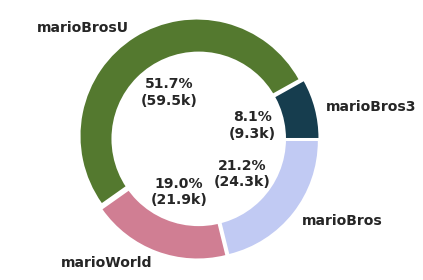

In [21]:
# values
labels = courses['gameStyle'].unique().tolist()
values = [sum(courses['gameStyle'] == label) for label in labels]
print(list(zip(labels, values)))
explode = [0.03] * len(values)

# plot
fig, ax = plt.subplots()
ax.pie(values, autopct=lambda pct: func(pct, values), pctdistance=0.45,
       colors=palette, explode=explode, labels=labels,
       textprops={'fontsize':fontsize,'weight':'bold'})
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# figure
ax.axis('equal')
plt.tight_layout()
# plt.savefig('%s/%s.pdf' % (plot_folder, 'gameStyle'), dpi=300, bbox_inches='tight')
plt.show()

## Makers

Players who develop game maps.

In [22]:
makers = courses['maker'].value_counts().to_dict()
print('number of makers: %d' % (len(makers)))

number of makers: 48621


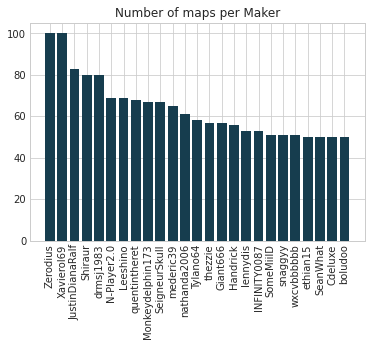

In [23]:
# values
top = 25
labels = list(makers.keys())[0:top]
x_axis = range(len(labels))
y_axis = list(makers.values())[0:top]

# plot
fig, ax = plt.subplots()
plt.bar(x_axis, y_axis, align='center', color=palette[0])
plt.xticks(x_axis, labels, rotation=90)
plt.title('Number of maps per Maker')
plt.show()

In [24]:
# players
players = players.set_index('id')
players.head()

df_tmp = pd.DataFrame(makers, index=['courses']).transpose()
df_tmp = df_tmp.rename(columns={'index':'id'})

df_tmp = pd.concat([df_tmp, players], sort=True, axis=1)
df_tmp = df_tmp.dropna(subset=['courses']).sort_values(by=['courses'], ascending=False)
df_tmp.head()

,courses,image,flag,name
Xavierol69,100.0,http://mii-images.cdn.nintendo.net/2q6bnifk217...,FR,Shira2
Zerodius,100.0,http://mii-images.cdn.nintendo.net/10s9tax9tth...,CA,Myuu
JustinDianaRalf,83.0,http://mii-images.cdn.nintendo.net/20teh66s59n...,DE,ralf
Shiraur,80.0,http://mii-images.cdn.nintendo.net/1x4h3o20p6l...,FR,Shira
drmsj1983,80.0,http://mii-images.cdn.nintendo.net/nvw6z8oqj1p...,CA,dan


In [25]:
countries = {flag:0 for flag in df_tmp['flag'].unique().tolist()}
for maker, row in df_tmp.iterrows():
    countries[row['flag']] += int(row['courses'])

{'FR': 40464, 'CA': 34485, 'DE': 37278, 'BR': 2729}


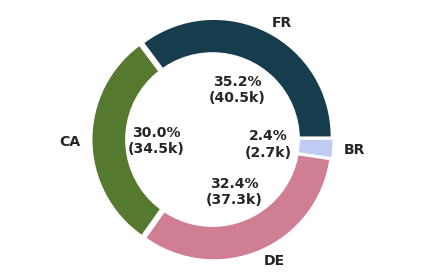

In [26]:
# values
labels = list(countries.keys())
values = [countries[label] for label in labels]
print(countries)
explode = [0.03] * len(labels)

# plot
fig, ax = plt.subplots()
ax.pie(values, autopct=lambda pct: func(pct, values), pctdistance=0.45,
       colors=palette, explode=explode, labels=labels,
       textprops={'fontsize':fontsize,'weight':'bold'})
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# figure
ax.axis('equal')  
plt.tight_layout()
# plt.savefig('%s/%s.pdf' % (plot_folder, 'countries'), dpi=300, bbox_inches='tight')
plt.show()

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id="network"></a>

---
# Games Interactions

The most popular courses in Super Mario Maker can be determined based on users' interactions with the game. In Super Mario Maker, users can play levels created by other users, and the number of plays, likes, and completions can be used to measure the popularity of a level. By analyzing these interactions, one could determine which courses are the most popular and well-received by the community.

In [27]:
# data sorted
df_tmp = pd.DataFrame(interactions).transpose()
df_tmp['sum'] = df_tmp['likes'] + df_tmp['plays'] + df_tmp['clears'] + df_tmp['records']
df_tmp = df_tmp.sort_values(by=['sum'], ascending=False)

In [28]:
df_tmp.head()

,likes,plays,clears,records,sum
5AB9-0000-038F-A23E,316,1673,1475,2,3466
DE4D-0000-035D-3AE1,462,1089,612,1,2164
8F40-0000-0391-4B50,185,1014,851,1,2051
CE94-0000-038F-7559,193,997,737,1,1928
BAC8-0000-036A-7EE1,322,937,622,1,1882


In [29]:
# settings
limit = 100
fontsize = 14

# getting axis
axis_id = df_tmp.index.tolist()[0:limit]
axis_plays = df_tmp['plays'].tolist()[0:limit]
axis_clears = df_tmp['clears'].tolist()[0:limit]
axis_records = df_tmp['records'].tolist()[0:limit]
axis_likes = df_tmp['likes'].tolist()[0:limit]

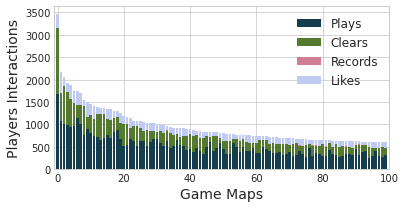

In [30]:
# plot
fig, ax = plt.subplots()
bottom_records  = [axis_plays[i] + axis_clears[i] for i in range(0, limit)]
bottom_likes    = [bottom_records[i] + axis_records[i] for i in range(0, limit)]

# bar plot
p1 = plt.bar(range(0, limit), axis_plays, color=palette[0], label='Plays')
p2 = plt.bar(range(0, limit), axis_clears, bottom=axis_plays, color=palette[1], label='Clears')
p3 = plt.bar(range(0, limit), axis_records, bottom=bottom_records, color=palette[2], label='Records')
p4 = plt.bar(range(0, limit), axis_likes, bottom=bottom_likes, color=palette[3], label='Likes')

# texts and labels
plt.ylabel('Players Interactions', fontsize=fontsize)
plt.xlabel('Game Maps', fontsize=fontsize)
ax.legend(prop={'size':fontsize-2})

# ticks
fig.set_size_inches(6, 3, forward=True)
plt.xlim(-1, 100)
# plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions'), dpi=300)
plt.show()

## Power law test  (Clauset et al. 2009)

The power law test is a statistical test used to determine whether a particular dataset follows a power law distribution or not. A power law distribution is a type of probability distribution that is characterized by a heavy tail, where a small number of observations have much larger values than the majority of observations.
- Paper - https://arxiv.org/pdf/0706.1062.pdf

In [31]:
# Install powerlaw methods
!pip install powerlaw==1.4.6
# !pip install git+https://github.com/jeffalstott/powerlaw.git@0141be075f947a08f8f3876fd69fc53c41b23abc

  Preparing metadata (setup.py) ... - done
  Created wheel for powerlaw: filename=powerlaw-1.4.6-py3-none-any.whl size=24787 sha256=3a1cdcee6fcadbc1f57840e77b74be3e5f1e568cc16a80f772752c1277aba0ee
  Stored in directory: /root/.cache/pip/wheels/ee/51/38/2e0f20cf80e1a0909acdd527df2288bd9feb8356b926d7d775
Successfully built powerlaw


In [32]:
import powerlaw
from scipy import stats
# -- ignore warning
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [33]:
data = df_tmp['sum']
fit = powerlaw.Fit(data, discrete=True, estimate_discrete=False)

Calculating best minimal value for power law fit


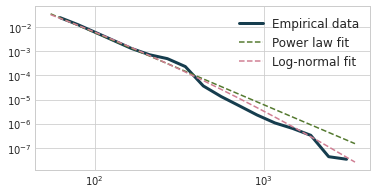

In [34]:
# plot
fig, ax = plt.subplots()
fig_powerlaw = fit.plot_pdf(linewidth=3, color=palette[0], label='Empirical data')
fit.power_law.plot_pdf(ax=fig_powerlaw, color=palette[1], linestyle='--', label='Power law fit')
fit.lognormal.plot_pdf(ax=fig_powerlaw, color=palette[2], linestyle='--', label='Log-normal fit')

# texts and labels
ax.legend(prop={'size':fontsize-2})

# ticks
fig.set_size_inches(6, 3, forward=True)
# plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions-powerlaw-PDF'), dpi=300)
plt.show()

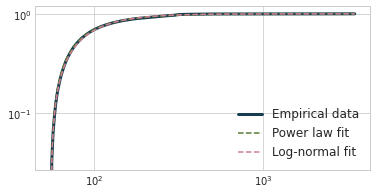

In [35]:
# plot
fig, ax = plt.subplots()
fig_powerlaw = fit.plot_cdf(linewidth=3, color=palette[0], label='Empirical data')
fit.power_law.plot_cdf(ax=fig_powerlaw, color=palette[1], linestyle='--', label='Power law fit')
fit.lognormal.plot_cdf(ax=fig_powerlaw, color=palette[2], linestyle='--', label='Log-normal fit')

# texts and labels
ax.legend(prop={'size':fontsize-2})

# ticks
fig.set_size_inches(6, 3, forward=True)
# plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions-powerlaw-CDF'), dpi=300)
plt.show()

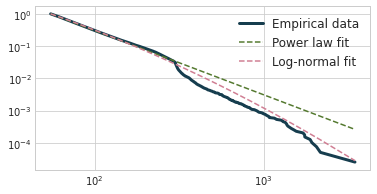

In [36]:
# plot
fig, ax = plt.subplots()
fig_powerlaw = fit.plot_ccdf(linewidth=3, color=palette[0], label='Empirical data')
fit.power_law.plot_ccdf(ax=fig_powerlaw, color=palette[1], linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig_powerlaw, color=palette[2], linestyle='--', label='Log-normal fit')

# texts and labels
ax.legend(prop={'size':fontsize-2})

# ticks
fig.set_size_inches(6, 3, forward=True)
# plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions-powerlaw-CCDF'), dpi=300)
plt.show()

## Kolmogorov-smirnov (test)

Testing with diverse types of distribution.  

-   `D`: Close to 0 (better), drawn from the same distribution.
-   `p`: significance level, high is better.

In [37]:
cdfs = [
    "norm",            #Normal (Gaussian)
    "alpha",           #Alpha
    "anglit",          #Anglit
    "arcsine",         #Arcsine
    "beta",            #Beta
    "betaprime",       #Beta Prime
    "bradford",        #Bradford
    "burr",            #Burr
    "cauchy",          #Cauchy
    "chi",             #Chi
    "chi2",            #Chi-squared
    "cosine",          #Cosine
    "dgamma",          #Double Gamma
    "dweibull",        #Double Weibull
    "erlang",          #Erlang
    "expon",           #Exponential
    "exponweib",       #Exponentiated Weibull
    "exponpow",        #Exponential Power
    "fatiguelife",     #Fatigue Life (Birnbaum-Sanders)
    "foldcauchy",      #Folded Cauchy
    "f",               #F (Snecdor F)
    "fisk",            #Fisk
    "foldnorm",        #Folded Normal
    "gamma",           #Gamma
    
#     "gausshyper",      #Gauss Hypergeometric
    
    "genexpon",        #Generalized Exponential
    "genextreme",      #Generalized Extreme Value
    "gengamma",        #Generalized gamma
    "genlogistic",     #Generalized Logistic
    "genpareto",       #Generalized Pareto
    "genhalflogistic", #Generalized Half Logistic
    "gilbrat",         #Gilbrat
    "gompertz",        #Gompertz (Truncated Gumbel)
    "gumbel_l",        #Left Sided Gumbel, etc.
    "gumbel_r",        #Right Sided Gumbel
    "halfcauchy",      #Half Cauchy
    "halflogistic",    #Half Logistic
    "halfnorm",        #Half Normal
    "hypsecant",       #Hyperbolic Secant
    "invgamma",        #Inverse Gamma
    "invweibull",      #Inverse Weibull
    "johnsonsb",       #Johnson SB
    "johnsonsu",       #Johnson SU
    "laplace",         #Laplace
    "logistic",        #Logistic
    "loggamma",        #Log-Gamma
    "loglaplace",      #Log-Laplace (Log Double Exponential)
    "lognorm",         #Log-Normal
    "lomax",           #Lomax (Pareto of the second kind)
    "maxwell",         #Maxwell
    "mielke",          #Mielke's Beta-Kappa
    "nakagami",        #Nakagami
    
#     "ncx2",            #Non-central chi-squared
#     "ncf",             #Non-central F
#     "nct",             #Non-central Student's T
    
    "pareto",          #Pareto
    "powerlaw",        #Power-function
    "powerlognorm",    #Power log normal
    "powernorm",       #Power normal
    "rdist",           #R distribution
    "reciprocal",      #Reciprocal
    "rayleigh",        #Rayleigh
    "rice",            #Rice
    "recipinvgauss",   #Reciprocal Inverse Gaussian
    "semicircular",    #Semicircular
    "t",               #Student's T
    "triang",          #Triangular
    "truncexpon",      #Truncated Exponential
    "truncnorm",       #Truncated Normal
    
#     "tukeylambda",     #Tukey-Lambda
    
    "uniform",         #Uniform
    "vonmises",        #Von-Mises (Circular)
    "wald",            #Wald
    "weibull_min",     #Minimum Weibull (see Frechet)
    "weibull_max",     #Maximum Weibull (see Frechet)
    "wrapcauchy",      #Wrapped Cauchy
    
#     "ksone",           #Kolmogorov-Smirnov one-sided (no stats)
#     "kstwobign"        #Kolmogorov-Smirnov two-sided test for Large N
    ]

In [38]:
for cdf in cdfs:
    # fit our data set against every probability distribution
    parameters = eval("stats."+cdf+".fit(data)")
    # applying the Kolmogorov-Smirnof test
    D, p = stats.kstest(data, cdf, args=parameters)
    # print
    print('p = %.25f, D = %.4f (%s)' % (p,D,cdf))

p = 0.0000000000000000000000000, D = 0.2251 (norm)
p = 0.0000000000000000000000000, D = 0.0195 (alpha)
p = 0.0000000000000000000000000, D = 0.6330 (anglit)
p = 0.0000000000000000000000000, D = 0.8237 (arcsine)
p = 0.0000000000000000000000000, D = 0.1046 (beta)
p = 0.0000000000000000000000000, D = 0.0272 (betaprime)
p = 0.0000000000000000000000000, D = 0.8744 (bradford)
p = 0.0000000000000000001714295, D = 0.0138 (burr)
p = 0.0000000000000000000000000, D = 0.1555 (cauchy)
p = 0.0000000000000000000000000, D = 0.1976 (chi)
p = 0.0000000000000000000000000, D = 0.1094 (chi2)
p = 0.0000000000000000000000000, D = 0.5688 (cosine)
p = 0.0000000000000000000000000, D = 0.1918 (dgamma)
p = 0.0000000000000000000000000, D = 0.1712 (dweibull)
p = 0.0000000000000000000000000, D = 0.1065 (erlang)
p = 0.0000000000000000000000000, D = 0.1764 (expon)
p = 0.0000000000000000000000000, D = 0.0232 (exponweib)
p = 0.0000000000000000000000000, D = 0.2400 (exponpow)
p = 0.0000000000000000000000000, D = 0.0722 (f